In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from config import RESULTS_FILE, BASE_DIR

dataset_name = 'loan_status'

# Load results
overall_results = pd.read_csv(RESULTS_FILE)

### Test
# Load feature-based and XPER-based clustering data
test_feature_clusters_file = os.path.join(BASE_DIR, dataset_name, "xper_values", "test_feature_clusters.csv")
test_xper_clusters_file = os.path.join(BASE_DIR, dataset_name, "xper_values", "test_xper_clusters.csv")

test_df_feature_clusters = pd.read_csv(test_feature_clusters_file)
test_df_xper_clusters = pd.read_csv(test_xper_clusters_file)


### Train 
# Load feature-based and XPER-based clustering data
train_feature_clusters_file = os.path.join(BASE_DIR, dataset_name, "xper_values", "train_feature_clusters.csv")
train_xper_clusters_file = os.path.join(BASE_DIR, dataset_name, "xper_values", "train_xper_clusters.csv")

train_df_feature_clusters = pd.read_csv(train_feature_clusters_file)
train_df_xper_clusters = pd.read_csv(train_xper_clusters_file)



# Load XPER values for distribution
xper_values_file = os.path.join(BASE_DIR, dataset_name, "xper_values", "test_per_instance_xper.csv")
df_xper_values = pd.read_csv(xper_values_file)



# Load original feature data
feature_data_file = os.path.join(BASE_DIR, dataset_name, "data", "full_dataset.csv")
df_features = pd.read_csv(feature_data_file)

# Merge feature data with cluster assignments
test_df_feature_clusters = test_df_feature_clusters.merge(df_features, left_on="Index", right_index=True)
test_df_xper_clusters = test_df_xper_clusters.merge(df_features, left_on="Index", right_index=True)

# Merge feature data with cluster assignments
train_df_feature_clusters = train_df_feature_clusters.merge(df_features, left_on="Index", right_index=True)
train_df_xper_clusters = train_df_xper_clusters.merge(df_features, left_on="Index", right_index=True)


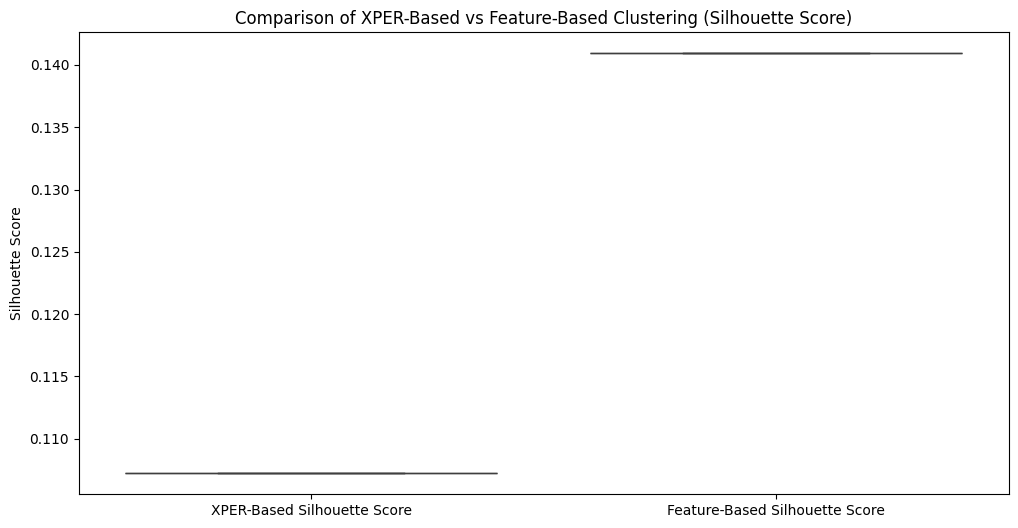

/Users/nicolasschroeder/miniconda3/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/nicolasschroeder/miniconda3/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


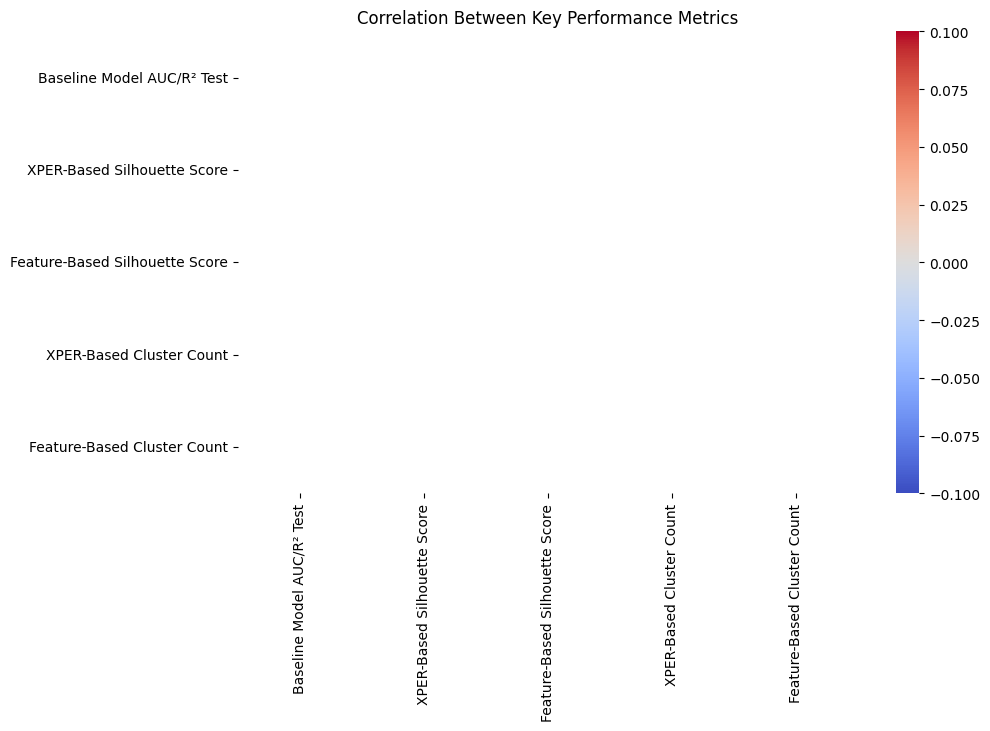

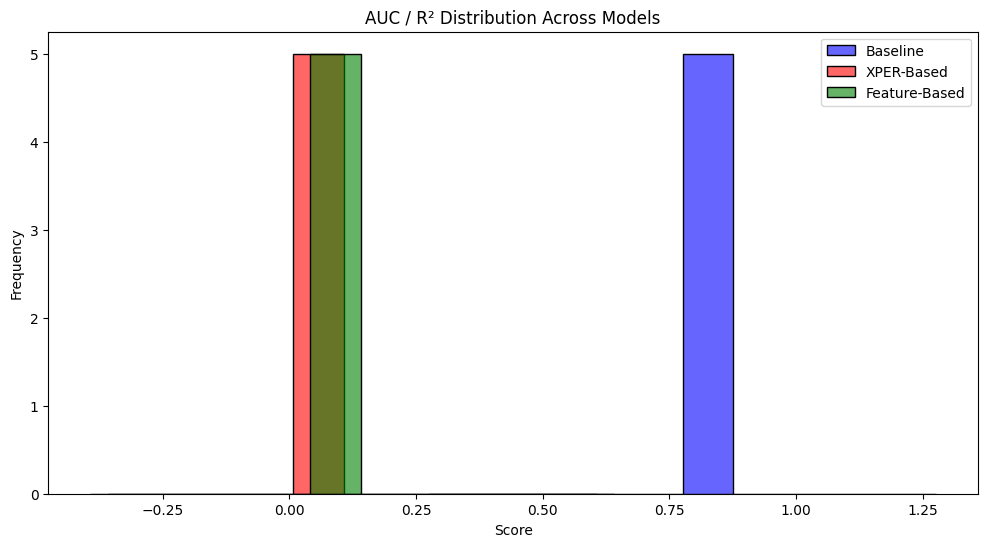

/var/folders/hj/9y9q9zfd6m58b4vmlgblc7rw0000gn/T/ipykernel_68150/2300328725.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["XPER-Based Clustering", "Feature-Based Clustering"],


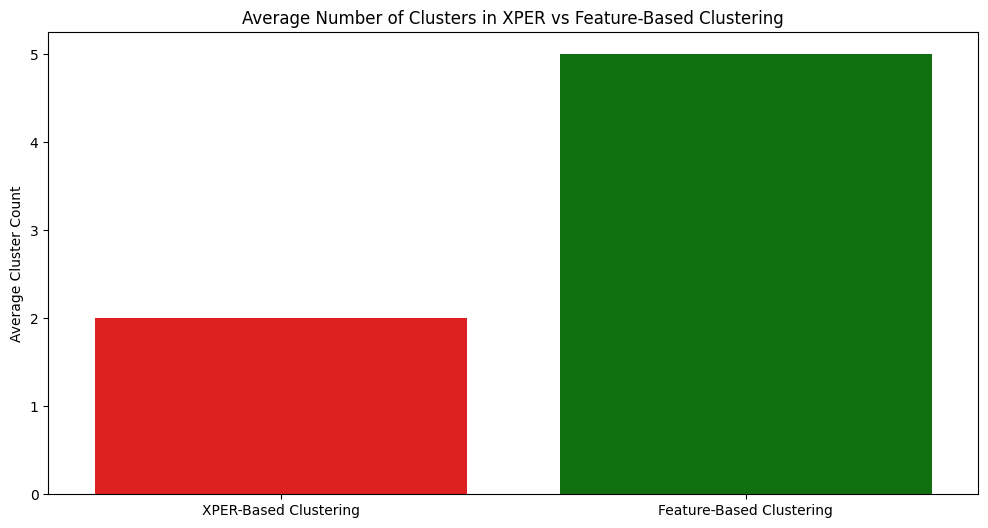


✅ Comprehensive evaluation completed!


In [2]:

# Load final results
sum_file_path = os.path.join(BASE_DIR, "overall_results.csv")
df_results = pd.read_csv(sum_file_path)

# Select relevant evaluation metrics
metrics = [
    "Baseline Model AUC/R² Test",
    "XPER-Based Silhouette Score",
    "Feature-Based Silhouette Score",
    "XPER-Based Cluster Count",
    "Feature-Based Cluster Count"
]

# Performance Comparison (XPER vs Feature-Based)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_results[["XPER-Based Silhouette Score", "Feature-Based Silhouette Score"]])
plt.title("Comparison of XPER-Based vs Feature-Based Clustering (Silhouette Score)")
plt.ylabel("Silhouette Score")
plt.show()

# Correlation heatmap between performance metrics
plt.figure(figsize=(10, 6))
sns.heatmap(df_results[metrics].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Key Performance Metrics")
plt.show()

# AUC / R² Score comparison
plt.figure(figsize=(12, 6))
sns.histplot(df_results["Baseline Model AUC/R² Test"], bins=10, kde=True, label="Baseline", color="blue", alpha=0.6)
sns.histplot(df_results["XPER-Based Silhouette Score"], bins=10, kde=True, label="XPER-Based", color="red", alpha=0.6)
sns.histplot(df_results["Feature-Based Silhouette Score"], bins=10, kde=True, label="Feature-Based", color="green", alpha=0.6)
plt.legend()
plt.title("AUC / R² Distribution Across Models")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Compare the number of clusters in each method
plt.figure(figsize=(12, 6))
sns.barplot(x=["XPER-Based Clustering", "Feature-Based Clustering"], 
            y=[df_results["XPER-Based Cluster Count"].mean(), df_results["Feature-Based Cluster Count"].mean()], 
            palette=["red", "green"])
plt.ylabel("Average Cluster Count")
plt.title("Average Number of Clusters in XPER vs Feature-Based Clustering")
plt.show()

print("\n✅ Comprehensive evaluation completed!")


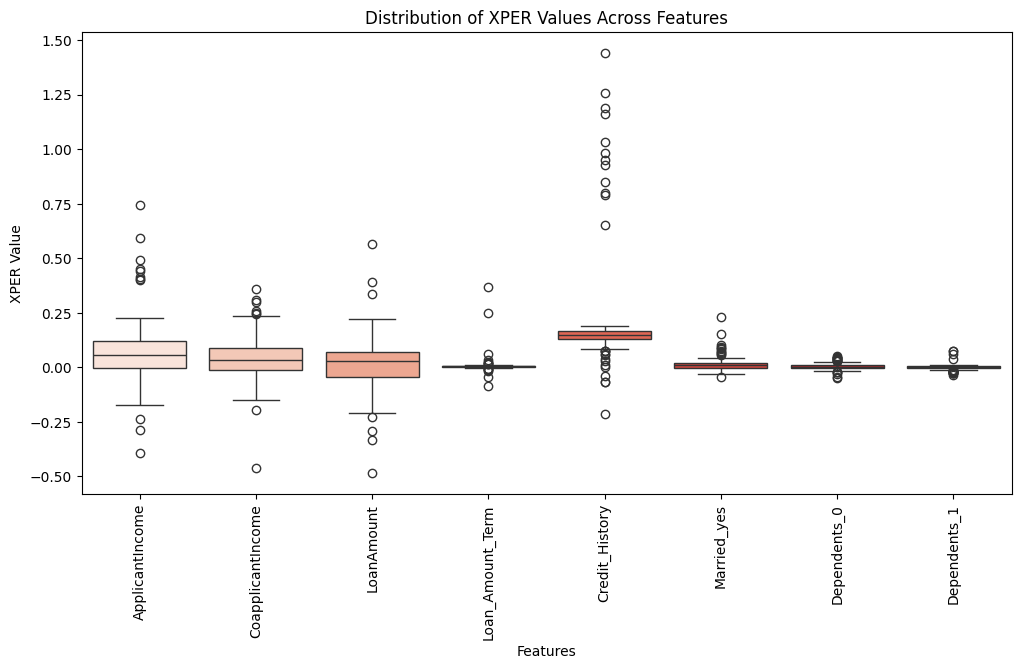

In [15]:

def plot_xper_distribution(df_xper_values):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_xper_values.drop(columns=["Benchmark"]), palette="Reds", )
    plt.xticks(rotation=90)
    plt.title("Distribution of XPER Values Across Features")
    plt.xlabel("Features")
    plt.ylabel("XPER Value")
    plt.show()


plot_xper_distribution(df_xper_values)

4


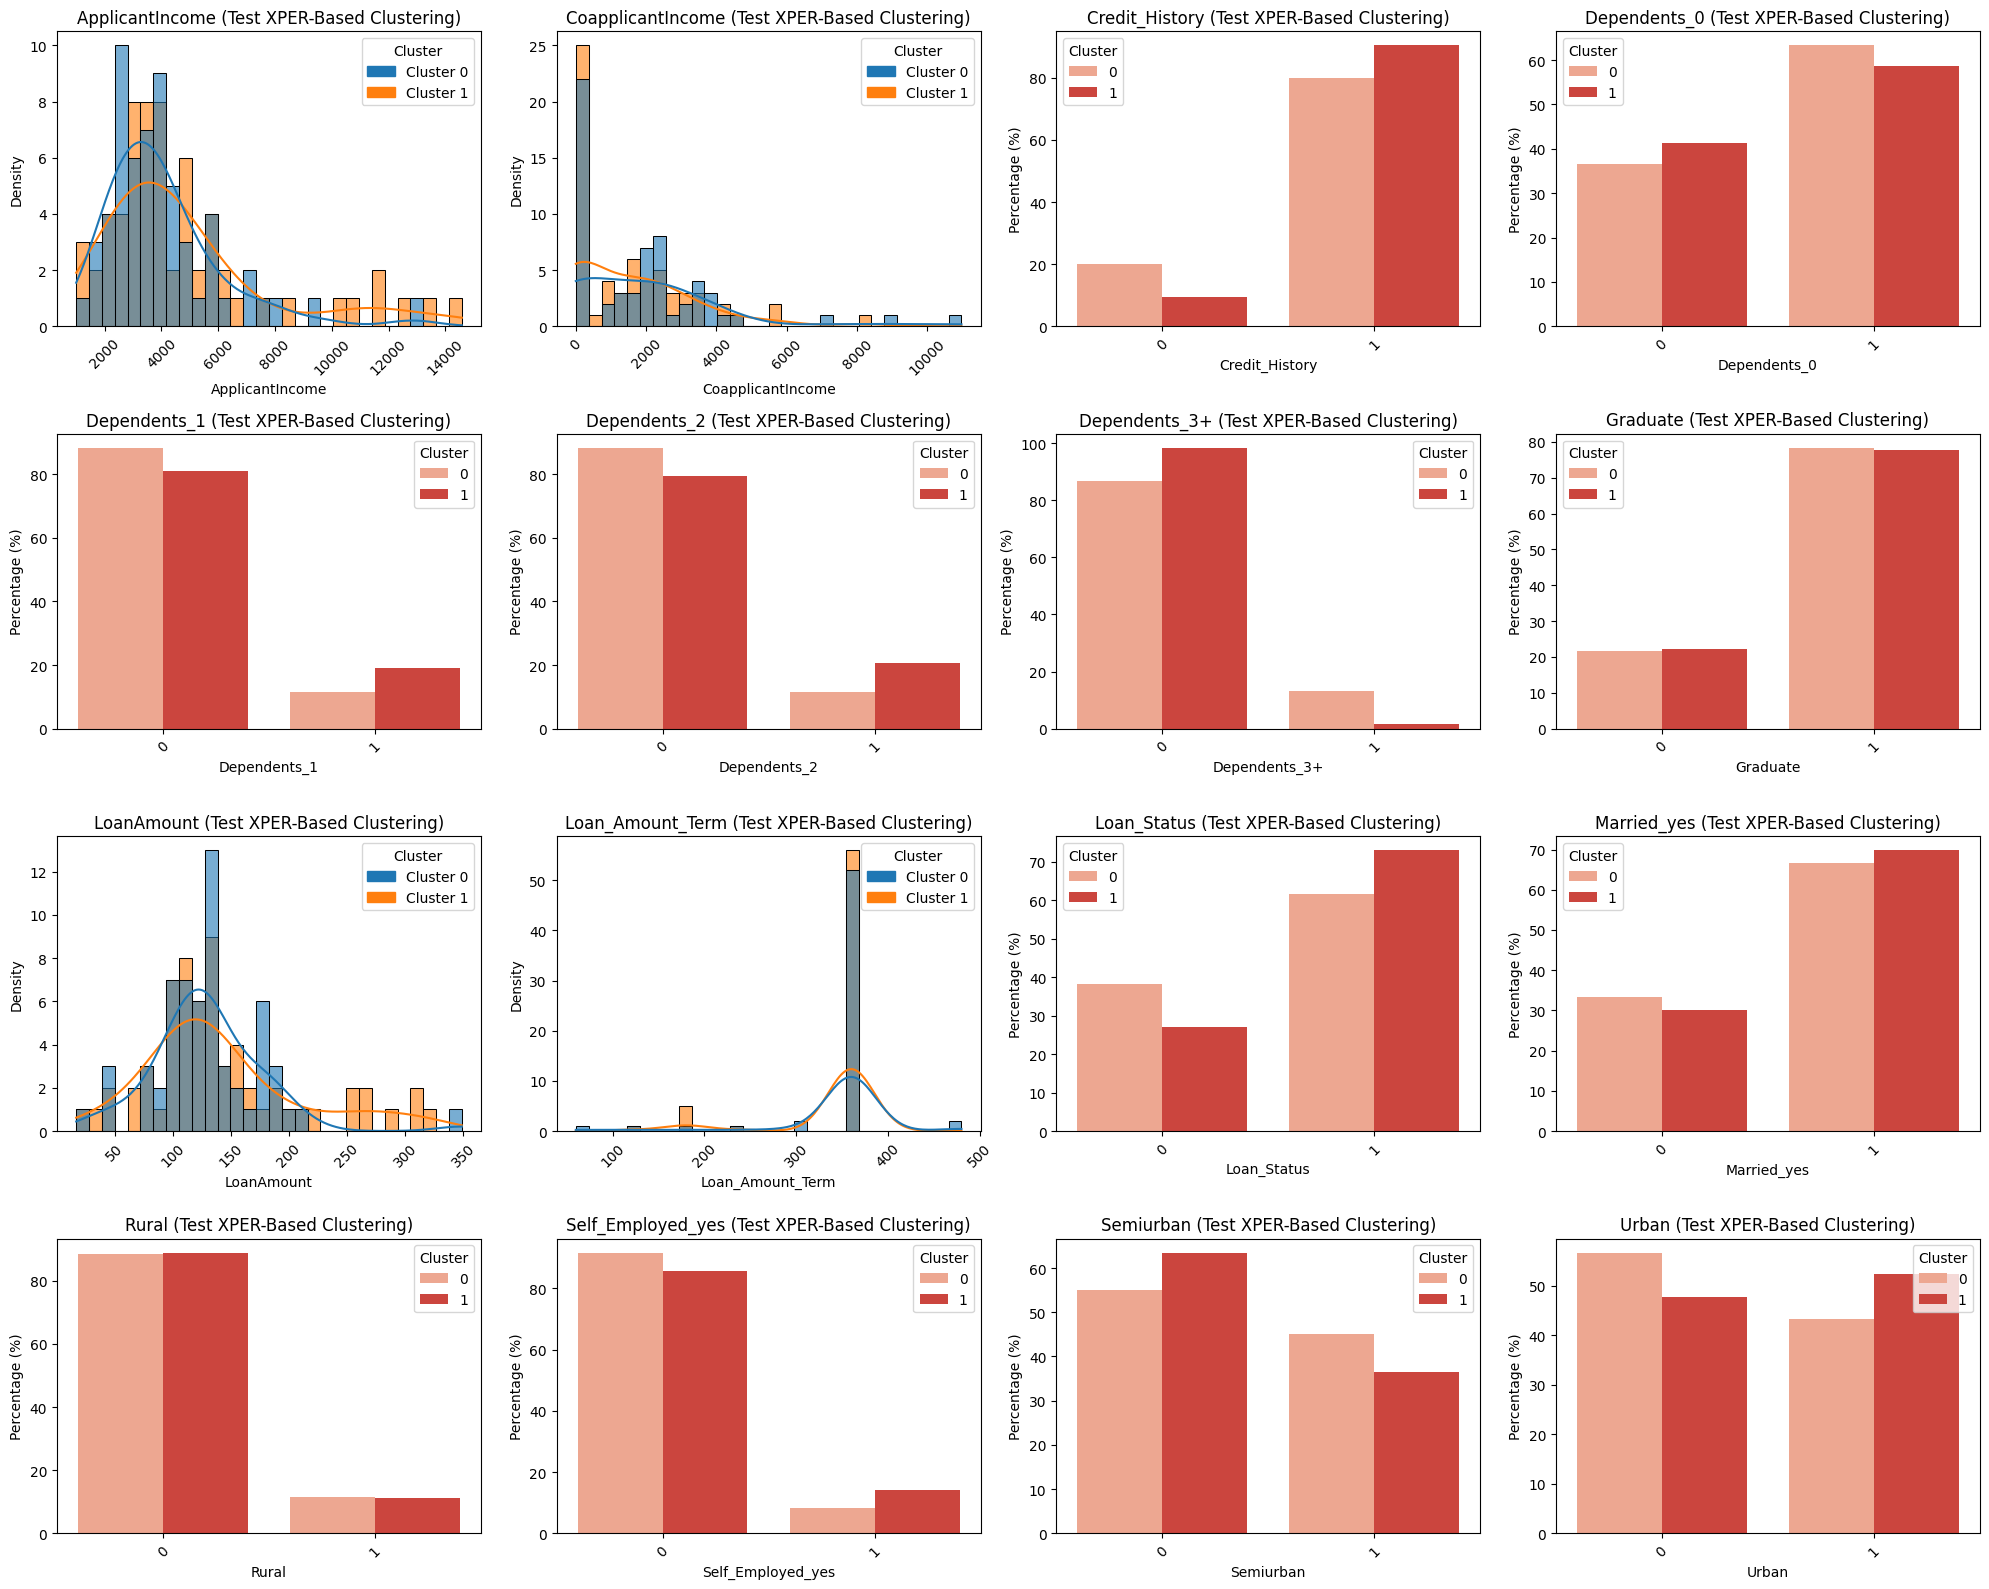

4


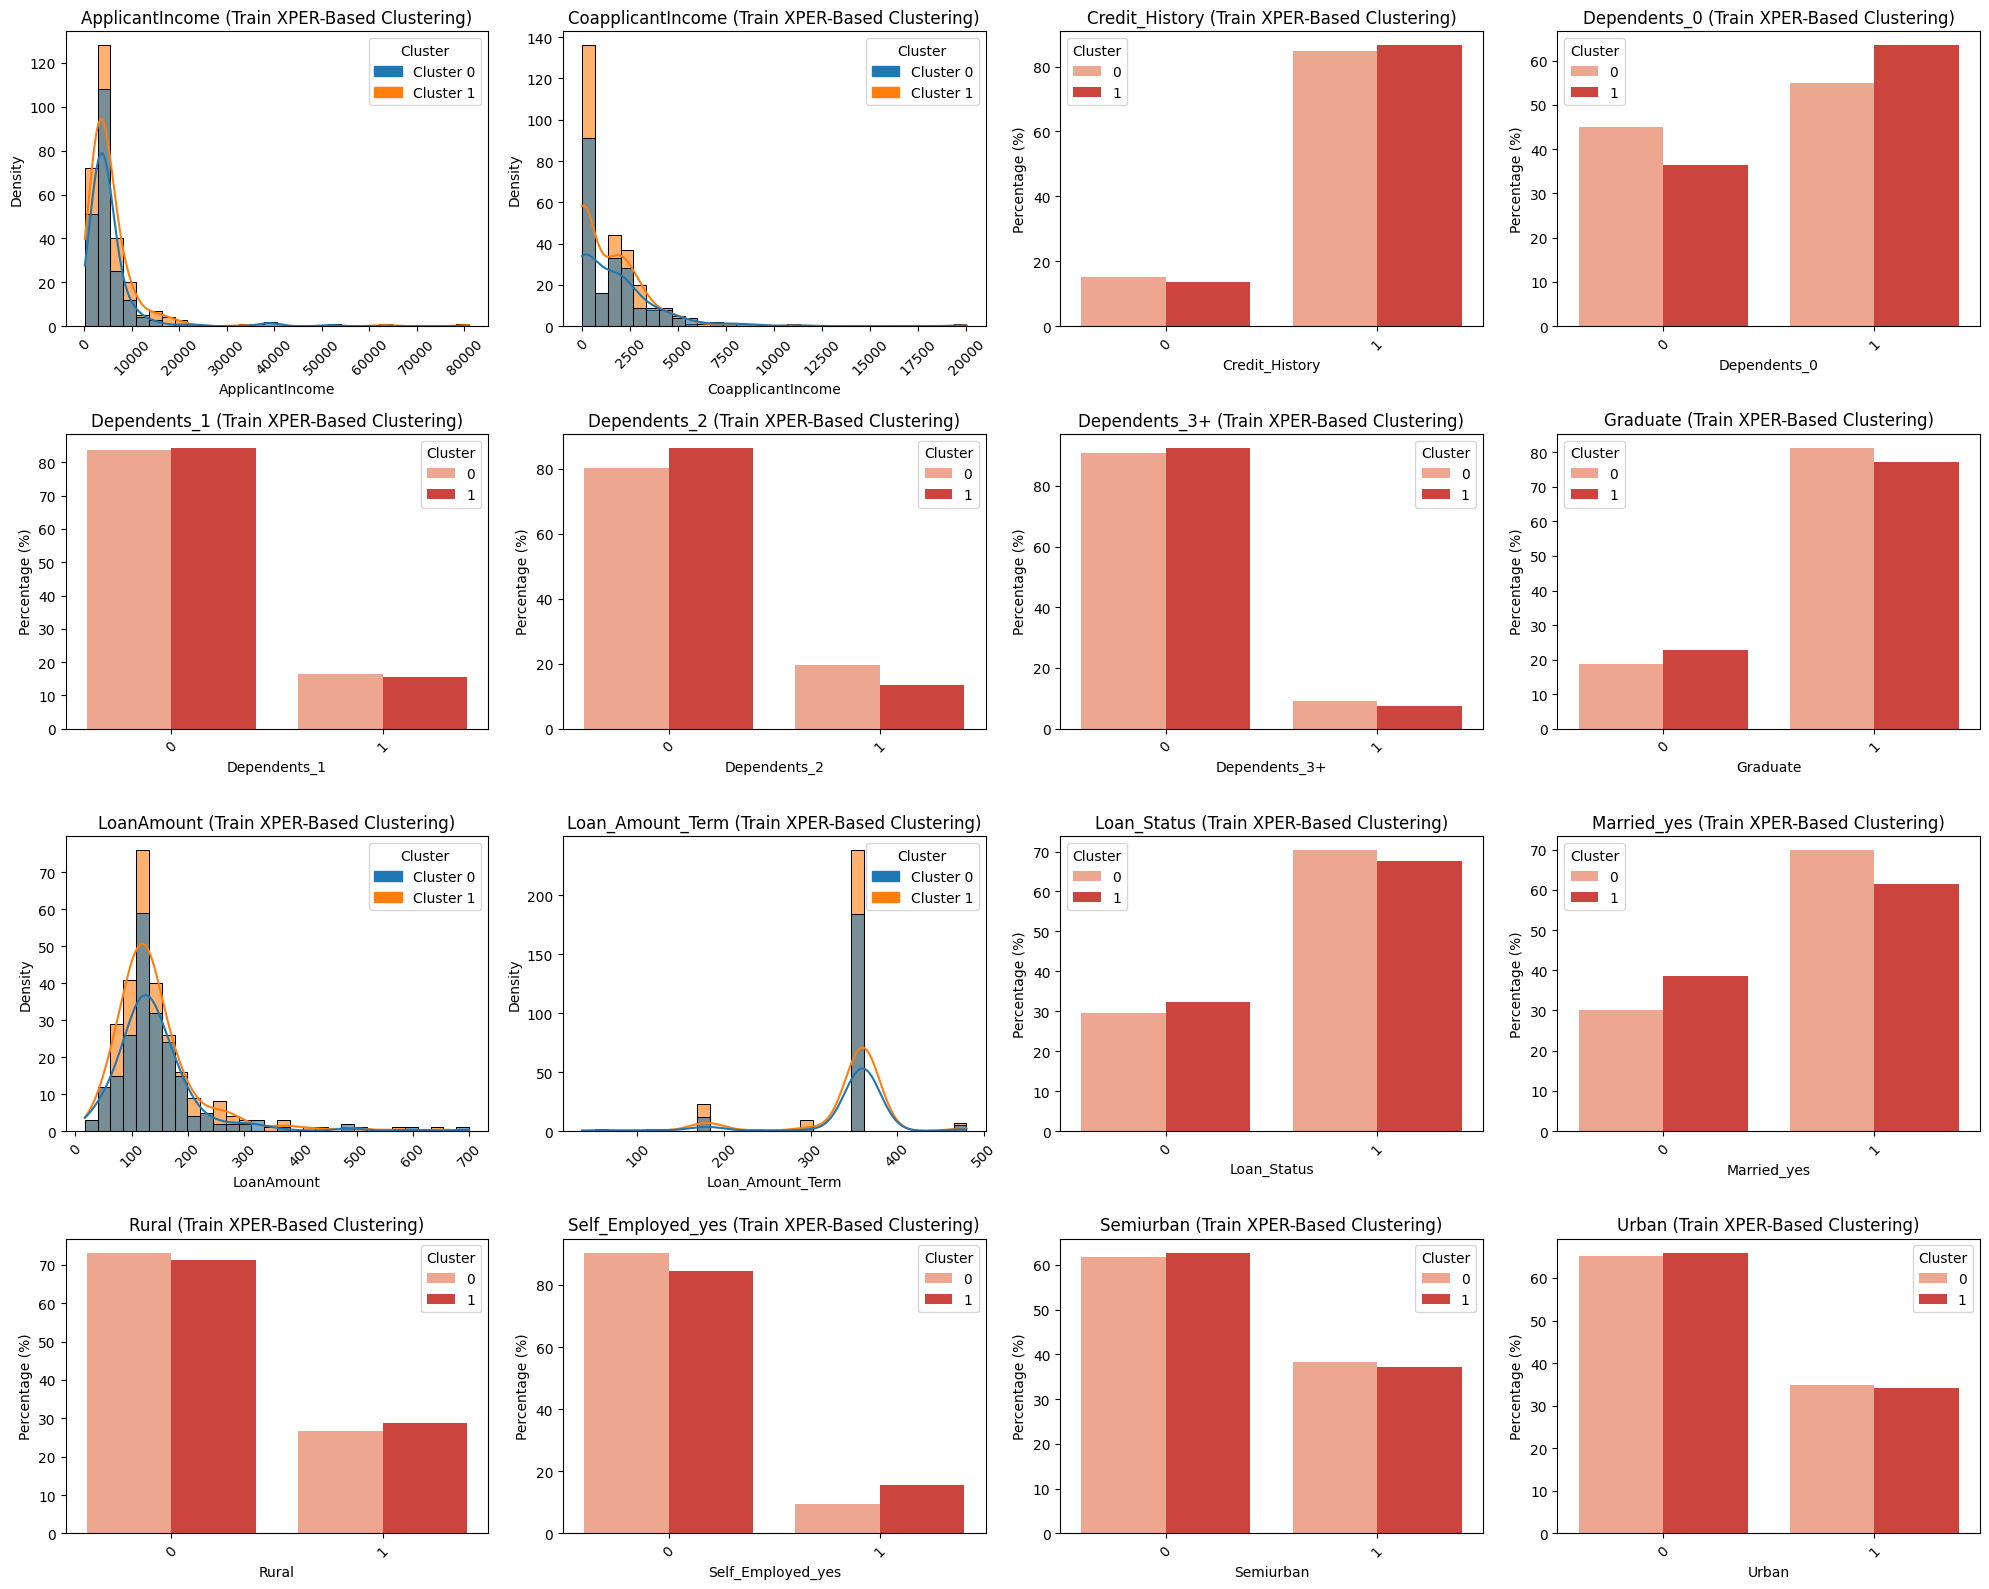

4


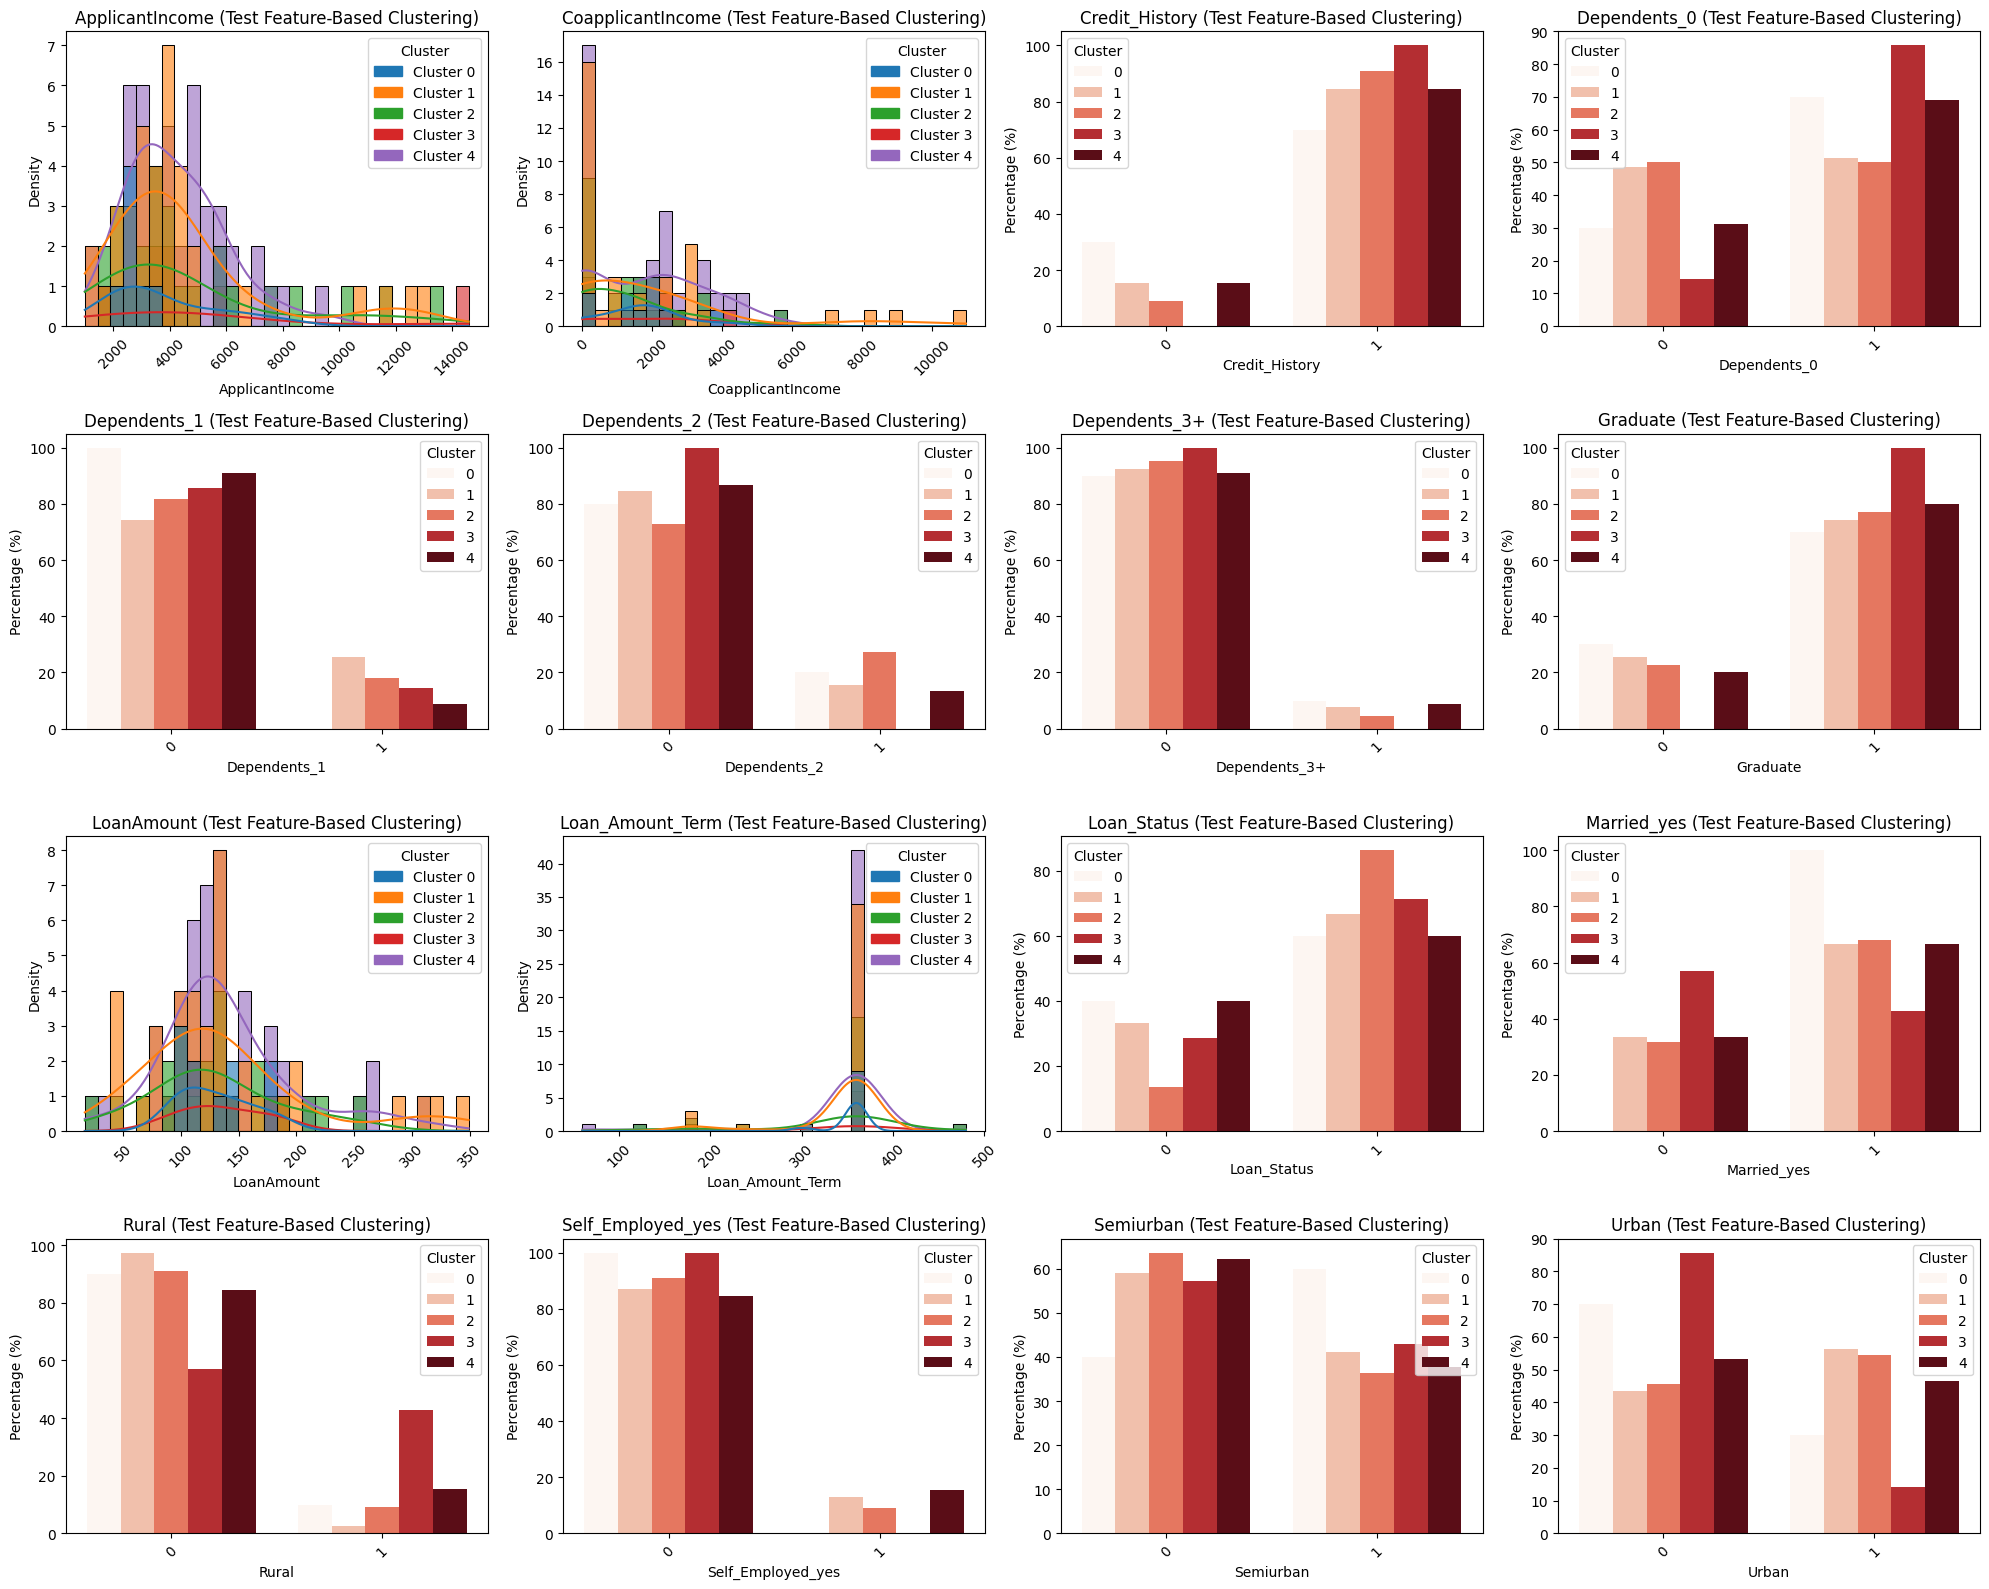

4


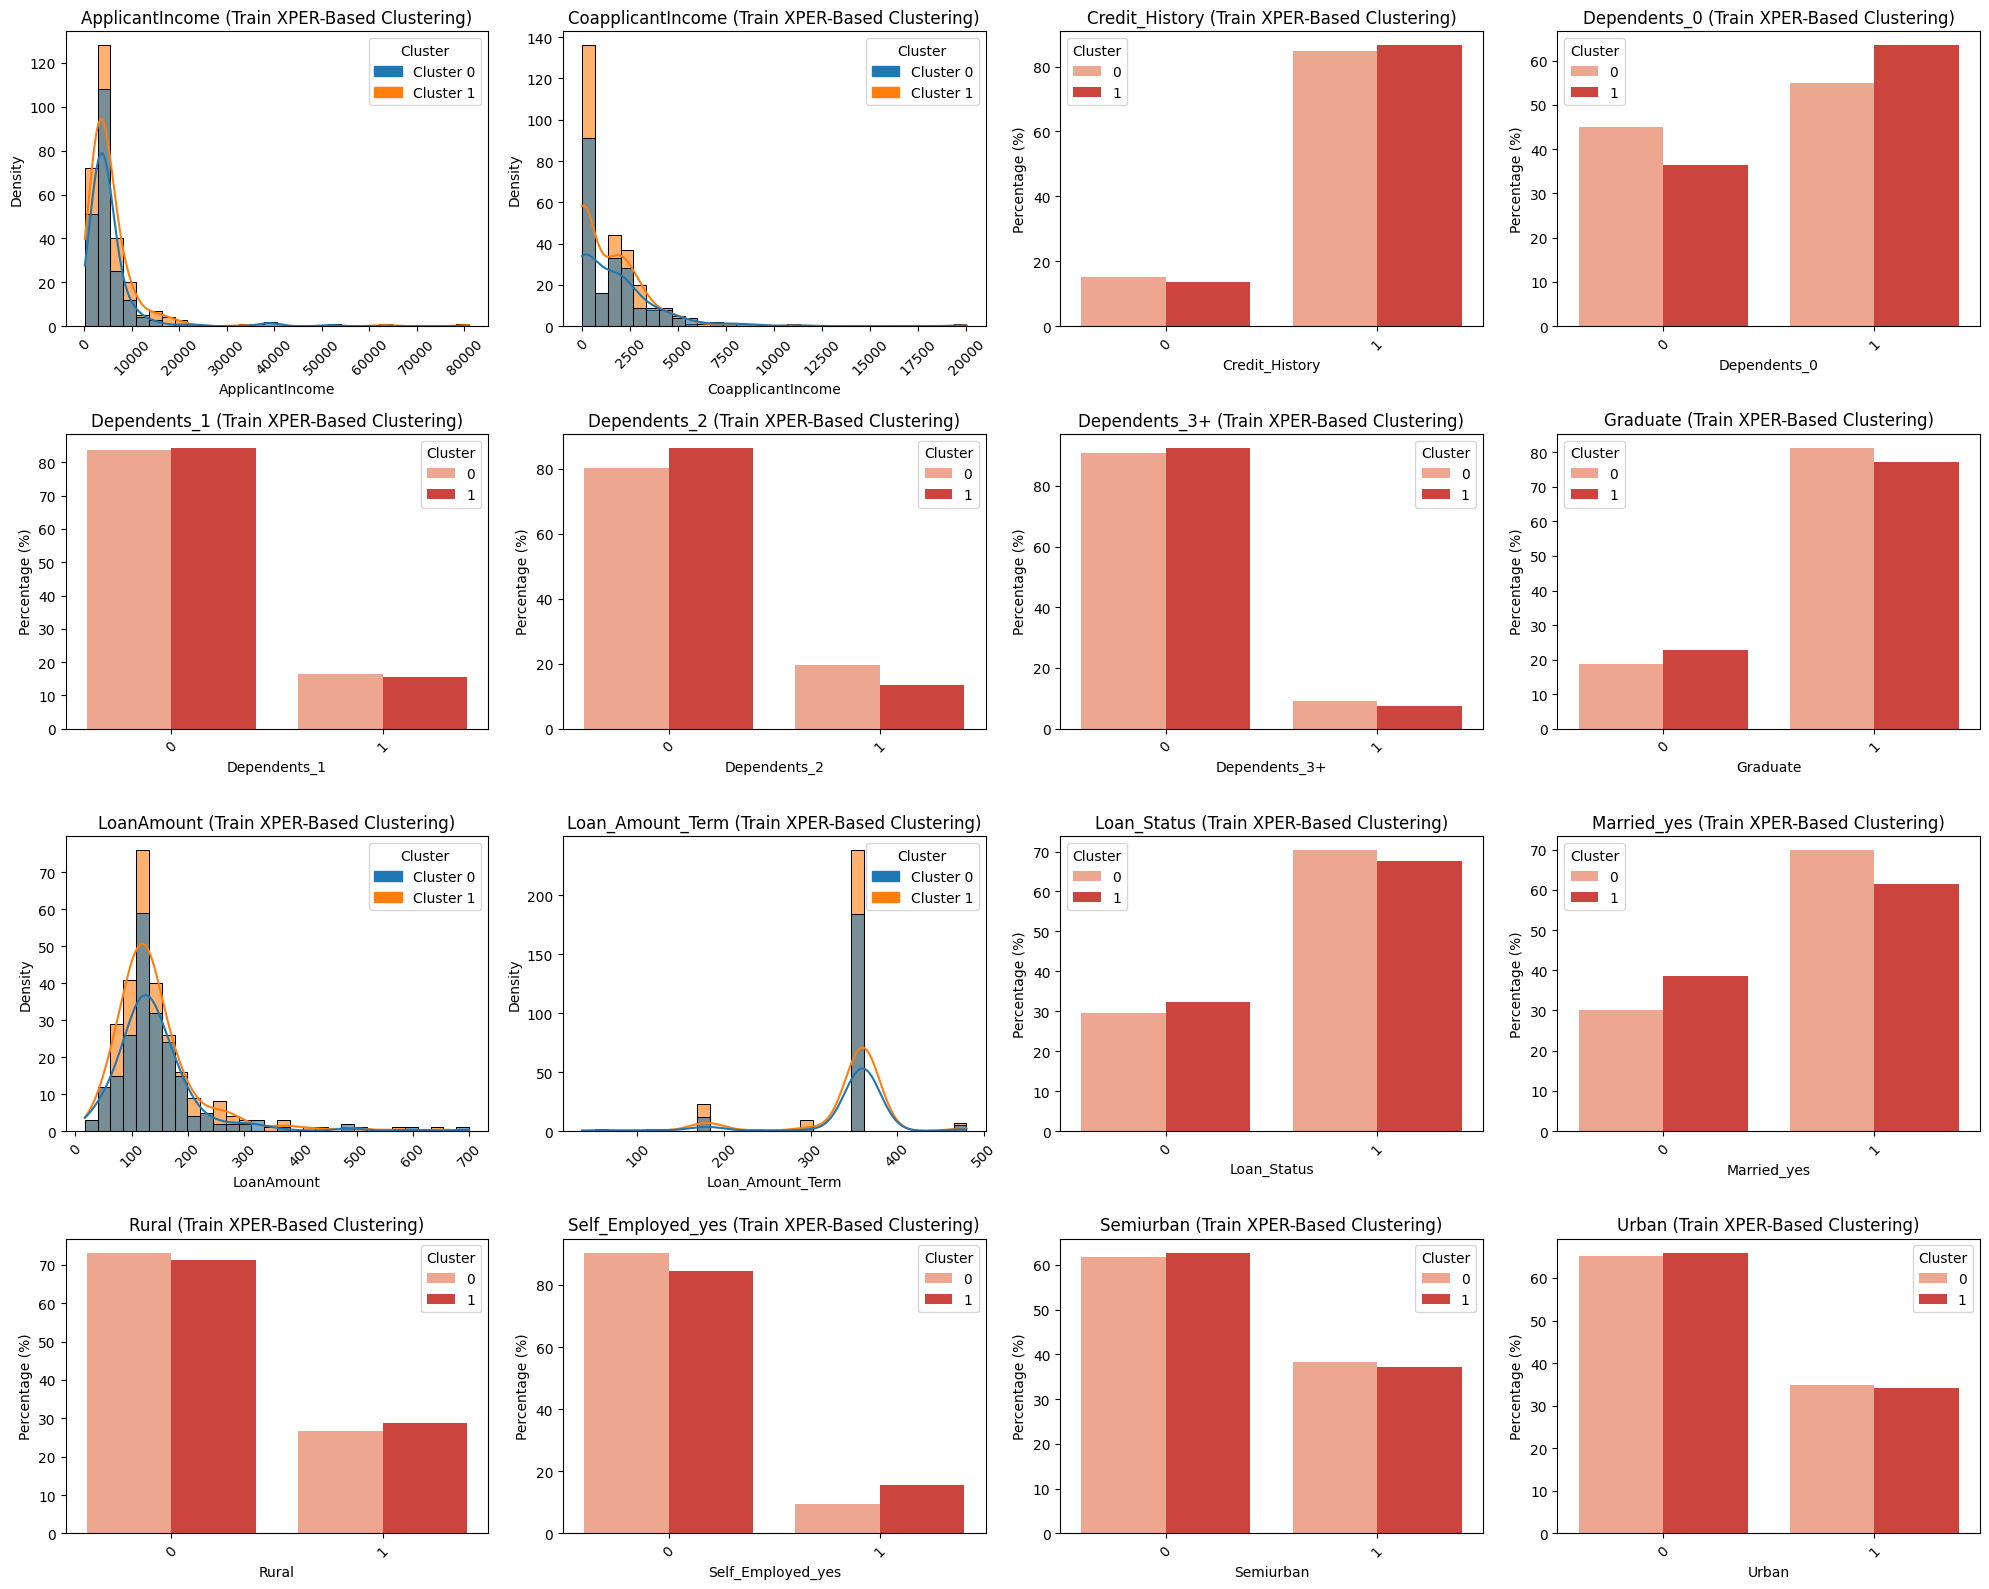

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches  # Fix for missing legends
import math

def plot_feature_distributions_grid(df_clusters, method):
    """Plots feature distributions in a 4x4 grid for given clustering method.
    - Uses histplot for continuous variables with distinct colors for each cluster.
    - Uses bar plots for categorical variables (less than 5 unique values) with int labels.
    - Manually adds a legend for numeric features (fixing missing legend issue).
    """
    features = df_clusters.columns.difference(["Index", "Cluster"])
    n_features = len(features)
    
    # Create 4x4 subplot grid
    lower_bar = int(math.floor(math.sqrt(n_features)))
    subplots = lower_bar + 1 if lower_bar % 1 != 0 else lower_bar
    fig, axes = plt.subplots(subplots, subplots, figsize=(20, 16))
    axes = axes.flatten()  # Flatten to easily iterate over it
    
    # Use strong distinct colors for numeric features
    cluster_palette = sns.color_palette("tab10", n_colors=df_clusters["Cluster"].nunique())

    for i, feature in enumerate(features):
        ax = axes[i]  # Select subplot
        
        # Drop NaNs for accurate plotting
        df_clusters_clean = df_clusters.dropna(subset=[feature]).copy()
        
        # Ensure numeric conversion for KDE/histogram plots
        try:
            df_clusters_clean[feature] = pd.to_numeric(df_clusters_clean[feature], errors='coerce')
        except:
            pass  # If conversion fails, it remains categorical

        unique_values = df_clusters_clean[feature].dropna().unique()

        if len(unique_values) < 5:
            # Convert feature to integer values for proper binning
            df_clusters_clean[feature] = df_clusters_clean[feature].astype(int)

            # Count occurrences of each category per cluster
            category_counts = df_clusters_clean.groupby(["Cluster", feature]).size().reset_index(name="Count")

            # Normalize counts to sum to 100% within each feature category
            total_counts = category_counts.groupby("Cluster")["Count"].transform("sum")
            category_counts["Percentage"] = category_counts["Count"] / total_counts * 100  # Convert to %

            # Plot as a stacked bar chart where each x-category sums to 100%
            sns.barplot(data=category_counts, x=feature, y="Percentage", hue="Cluster", palette="Reds", ax=ax)
            ax.set_ylabel("Percentage (%)")
            ax.set_xticks(sorted(df_clusters_clean[feature].unique()))  # Ensure proper integer x-axis labels



        else:
            # Use histogram for continuous variables
            sns.histplot(data=df_clusters_clean, x=feature, hue="Cluster", kde=True, bins=30, palette=cluster_palette, alpha=0.6, ax=ax)
            ax.set_ylabel("Density")

            # Manually create the legend (Fix for missing legend issue)
            cluster_labels = sorted(df_clusters_clean["Cluster"].unique())
            legend_patches = [mpatches.Patch(color=cluster_palette[j], label=f"Cluster {j}") for j in cluster_labels]
            ax.legend(handles=legend_patches, title="Cluster", loc="upper right")

        ax.set_title(f"{feature} ({method})")
        ax.set_xlabel(feature)
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

    # Hide unused subplots if there are fewer than 16 features
    for j in range(i + 1, 16):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Generate 4x4 grid for XPER-Based Clustering
plot_feature_distributions_grid(test_df_xper_clusters, "Test XPER-Based Clustering")
plot_feature_distributions_grid(train_df_xper_clusters, "Train XPER-Based Clustering")


# Generate 4x4 grid for Feature-Based Clustering
plot_feature_distributions_grid(test_df_feature_clusters, "Test Feature-Based Clustering")
plot_feature_distributions_grid(train_df_xper_clusters, "Train XPER-Based Clustering")



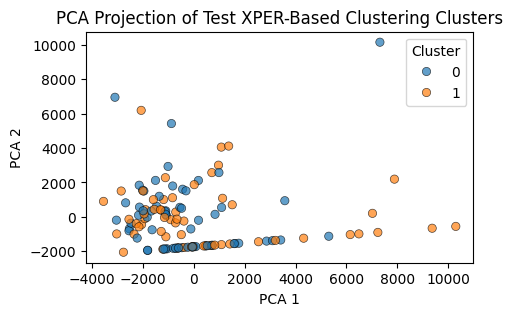

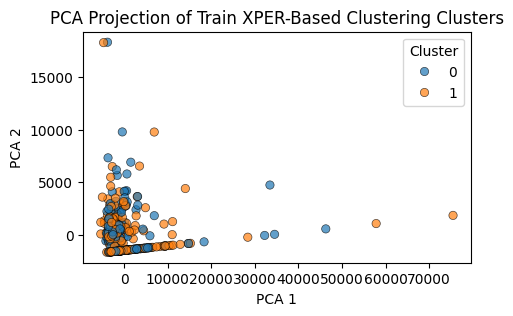

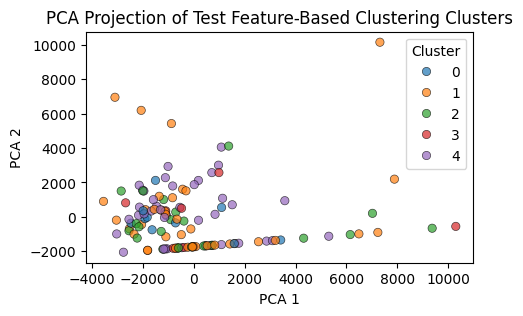

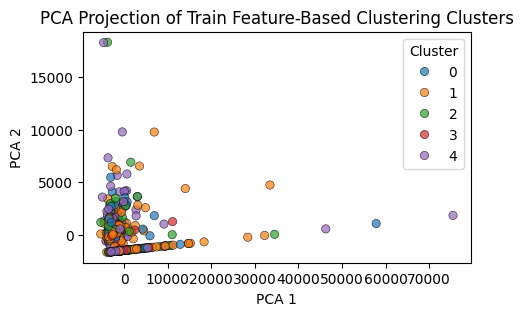

In [5]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Function to apply PCA and visualize clusters
def plot_pca_clusters(df_clusters, method):
    """Applies PCA to reduce features to 2D and plots the clusters."""
    features = df_clusters.columns.difference(["Index", "Cluster"])
    
    # Extract feature values and cluster labels
    X = df_clusters[features].dropna().values
    y = df_clusters["Cluster"].values

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2, random_state=42)
    embedding = pca.fit_transform(X)

    # Convert to DataFrame for easier plotting
    df_pca = pd.DataFrame(embedding, columns=["PCA 1", "PCA 2"])
    df_pca["Cluster"] = y

    # Create scatter plot
    plt.figure(figsize=(5, 3))
    sns.scatterplot(data=df_pca, x="PCA 1", y="PCA 2", hue="Cluster", palette="tab10", alpha=0.7, edgecolor="k")

    plt.title(f"PCA Projection of {method} Clusters")
    plt.legend(title="Cluster")
    plt.show()

# Generate PCA plots for XPER-Based Clustering
plot_pca_clusters(test_df_xper_clusters, "Test XPER-Based Clustering")
plot_pca_clusters(train_df_xper_clusters, "Train XPER-Based Clustering")

# Generate PCA plots for Feature-Based Clustering
plot_pca_clusters(test_df_feature_clusters, "Test Feature-Based Clustering")
plot_pca_clusters(train_df_feature_clusters, "Train Feature-Based Clustering")
